In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
data = pd.read_csv('depression.csv', header=0)
data = data.dropna()
data.drop(['Whichyear','Gender','Yourlocation','happywithlivingplace','donerecreationalactivitytoday','Age','Relationshipstatus', 'Understandingwithfamily','feelingpressureinyourstudy','supportsyouyouracademiclife','usedanysocialmedia','satisfiedwithmeal','feelingSick/healt issues'], axis=1, inplace=True)
data

,feelingrightnow,ExpressFeeling,Areyouhappyinancialy,succeededInEducationalinstitution,satisfiedwithacademicresult,haveinferioritycomplex,sleepAtNight
0,Very good,100,Yes,5,Yes,No,8
1,Normal,51,No,3,Yes,Maybe,8
2,Good,87,Yes,4,Yes,No,7
3,Bad,37,Yes,1,Yes,Maybe,5
4,Normal,56,No,4,No,No,7
...,...,...,...,...,...,...,...
226,Very good,96,Yes,4,No,No,10
227,Bad,24,Yes,2,No,No,7
228,Very good,91,Yes,5,Yes,No,8
229,Good,86,Yes,3,No,No,9


In [2]:
dummies = pd.get_dummies(data.feelingrightnow)
merged = pd.concat([data,dummies],axis='columns')
final = merged.drop(['feelingrightnow','Normal'], axis='columns') #!!dummy trap
dummies = pd.get_dummies(final.Areyouhappyinancialy)
merged = pd.concat([final,dummies],axis='columns')
final2 = merged.drop(['Areyouhappyinancialy','No'], axis='columns')
dummies = pd.get_dummies(final2.satisfiedwithacademicresult)
merged = pd.concat([final2,dummies],axis='columns')
final3 = merged.drop(['satisfiedwithacademicresult','Yes'], axis='columns')
dummies = pd.get_dummies(final3.haveinferioritycomplex)
merged = pd.concat([final3,dummies],axis='columns')
final4 = merged.drop(['haveinferioritycomplex'], axis='columns')
df = final4.loc[:,~final4.columns.duplicated()]
df

,ExpressFeeling,succeededInEducationalinstitution,sleepAtNight,Bad,Good,Very bad,Very good,No,Maybe,Yes
0,100,5,8,0,0,0,1,0,0,0
1,51,3,8,0,0,0,0,0,1,0
2,87,4,7,0,1,0,0,0,0,0
3,37,1,5,1,0,0,0,0,1,0
4,56,4,7,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
226,96,4,10,0,0,0,1,1,0,0
227,24,2,7,1,0,0,0,1,0,0
228,91,5,8,0,0,0,1,0,0,0
229,86,3,9,0,1,0,0,1,0,0


In [3]:
X = df.values[:,0:9]
X

array([[100,   5,   8, ...,   1,   0,   0],
       [ 51,   3,   8, ...,   0,   0,   1],
       [ 87,   4,   7, ...,   0,   0,   0],
       ...,
       [ 91,   5,   8, ...,   1,   0,   0],
       [ 86,   3,   9, ...,   0,   1,   0],
       [ 61,   3,   6, ...,   0,   0,   0]], dtype=int64)

In [4]:
m=X.shape[0] 
n=X.shape[1]
print(m,n)

231 9


In [5]:
import random
n_iter=100
K=5
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
Centroids

array([[25., 56., 51.,  8., 88.],
       [ 3.,  5.,  5.,  1.,  4.],
       [ 4.,  7.,  6.,  6.,  8.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  1.,  0.,  0.]])

In [6]:
Output={}
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
       tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
       EuclidianDistance=np.c_[EuclidianDistance,tempDist]
C=np.argmin(EuclidianDistance,axis=1)+1
C #protita Point k K=5 cluster er ekta te disi

array([5, 3, 5, 1, 2, 3, 2, 5, 2, 5, 2, 5, 3, 2, 4, 2, 4, 5, 1, 5, 2, 5,
       1, 3, 2, 4, 2, 4, 2, 1, 2, 5, 3, 2, 4, 3, 4, 3, 1, 3, 2, 3, 2, 1,
       5, 2, 4, 5, 4, 5, 5, 4, 2, 5, 5, 4, 3, 5, 5, 2, 1, 5, 4, 4, 4, 2,
       4, 5, 1, 5, 1, 1, 5, 5, 1, 5, 2, 5, 4, 1, 4, 5, 5, 2, 5, 1, 5, 5,
       5, 1, 5, 2, 5, 5, 4, 2, 2, 3, 3, 5, 2, 1, 2, 4, 2, 5, 2, 5, 3, 4,
       5, 4, 2, 5, 1, 4, 4, 5, 5, 3, 3, 5, 2, 1, 5, 2, 5, 3, 2, 5, 2, 2,
       5, 5, 5, 1, 3, 4, 5, 3, 5, 1, 1, 5, 3, 5, 5, 3, 4, 4, 5, 2, 5, 4,
       4, 5, 3, 4, 2, 2, 2, 2, 3, 5, 1, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 4, 4, 3, 5, 1, 5, 2, 4, 2, 1, 5, 3, 5, 5, 1, 5, 5, 5, 1, 5, 5,
       1, 2, 5, 5, 5, 1, 2, 5, 4, 4, 2, 4, 5, 1, 5, 5, 3, 5, 4, 5, 5, 1,
       5, 5, 3, 4, 2, 1, 5, 1, 5, 5, 2], dtype=int64)

In [7]:
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(9,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K):
    Y[k+1]=Y[k+1].T
    
for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0) #protita cluster er mean value k abr centroid hishebe assign krsi

In [8]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(9,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

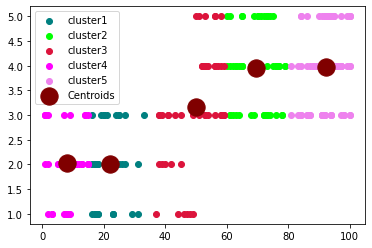

In [18]:
color=['Teal','lime','crimson','magenta','violet']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='maroon',label='Centroids')

plt.legend()
plt.show()